<p style="text-align: center;">
    МИНОБРНАУКИ РОССИИ <br>
    РГУ НЕФТИ И ГАЗА (НИУ) ИМЕНИ И.М. ГУБКИНА<br>
    ФАКУЛЬТЕТ АВТОМАТИКИ И ВЫЧИСЛИТЕЛЬНОЙ ТЕХНИКИ<br>
    КАФЕДРА АВТОМАТИЗИРОВАННЫХ СИСТЕМ УПРАВЛЕНИЯ<br>
    ДИСЦИПЛИНА <br>
        «Модели и методы обработки статистической информации в автоматизированном управлении НГО»
    <br><br> <br> <br> <br> <br> <br><br>
    ОТЧЁТ <br>
    по лабораторной работе №2 <br>
    «Статистический анализ одномерных выборок. Проверка статистических гипотез.»<br> <br> <br> <br> <br><br> <br> <br> <br> <br> <br><br>
</p>

<p style="text-align: right;">
    Выполнил: студент группы АС-21-05, Негробов В.А.<br>
    Проверила: старший преодаватель, Степанкина О.А.<br><br> <br> <br> <br> <br><br> <br> <br> <br> <br> <br><br><br> <br> <br> <br> <br><br>
</p>

<p style="text-align: center;">
    МОСКВА 2024
</p>

----------------------------------------------------------------------------------------
<br><br>Вариант 14 (2)

Дано:
7 одномерных случайных величин (одномерных выборок)
Задание:
1. Проверить каждую выборку на принадлежность к некоторому закону
распределения (данные и набор гипотез из работы 1), используя критерии хиквадрат и Колмогорова-Смирнова.

2. Можно ли в качестве оценки математического ожидания использовать
округленное до целого среднее значение? Обосновать.

3. Для пар нормально распределенных случайных величин проверить: $\mu_1 = \mu_2$; $\sigma_1^2 = \sigma_2^2$

4. Проверить однородность тех же (п. 3) выборок, используя непараметрические
критерии Колмогорова-Смирнова, Мана-Уитни, Уилкоксона.

5. Используя методы понижения дисперсии, оценить основные характеристики
выборки.

6. Провести проверку на наличие тренда в выборках. 

# Предварительная подготовка

Подключение используемых библиотек:

In [235]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pymannkendall as mk

from collections import namedtuple

Подключим стиль ggplot вывода графиков:

In [ ]:
plt.style.use('ggplot')

Создадим функцию, выполняющую проверку на нормальность с помощью критерия Хи-квадрт

In [ ]:
def get_uniform_freqs(values, mean=10):
    
    length = len(values)
    m = length // mean
    freqs = np.zeros(m)
    

    for i, (lower_bound, upper_bound) in enumerate(zip(x_values[:-1], x_values[1:])):
        freqs[i] = ((values > lower_bound) & (values < upper_bound)).sum()
    return freqs, mean

In [210]:
def get_freqs(values, func, mean=10):

    length = len(values)
    m = length // mean
    freqs = np.zeros(m)
    x_values = np.array([func(p) for p in np.linspace(0, 1, m+1)])
    
    freqs[0] = ((values >= x_values[0]) & (values <= x_values[1])).sum()
    for i, (lower_bound, upper_bound) in enumerate(zip(x_values[1:-1], x_values[2:])):
            freqs[i + 1] = ((values > lower_bound) & (values <= upper_bound)).sum()
            
    return freqs, mean

In [ ]:
def chisquaretest(values, distribution='uniform'):
    
    func = None
    
    if distribution == 'norm':
        func = stats.norm.ppf
    if distribution == 'uniform':
        func = lambda p: p
    freqs, mean = get_freqs(values, func)
    expected_freqs = np.ones_like(freqs) * mean
    return stats.chisquare(freqs, expected_freqs)

Создадим функцию, выполняющую проверку на равенство дисперсий с использованием статистики Фишера-Снедекора

In [ ]:
FischerSnedekorTestResult = namedtuple(
    'FischerSnedekorTestResult', ['statistic', 'pvalue']
)

In [226]:
def fischersnedekortest(value1, value2):
    statistic = (np.std(value1, ddof=1) / np.std(value2,ddof=1))**2
    pvalue = stats.f.sf(statistic, len(value1) - 1, len(value2) - 1)
    return FischerSnedekorTestResult(statistic, pvalue)

Считаем данные:

In [212]:
names = [f'var{i + 1}' for i in range(7)]
df = pd.read_excel('data1.xlsx', sheet_name='2',
                   header=None, names=names)
df

,var1,var2,var3,var4,var5,var6,var7
0,-16.427992,10.337568,10.094972,12.235925,10,16,-2.336080
1,-29.368694,20.601542,15.573639,12.159321,6,15,5.041232
2,-6.561724,1.876631,2.625150,24.552468,10,14,6.987623
3,7.358867,17.243398,15.855155,12.348476,9,14,9.542421
4,6.692038,-23.179041,11.742064,19.597243,9,15,11.116361
...,...,...,...,...,...,...,...
495,-14.625446,28.472332,3.514818,14.900529,8,9,11.921887
496,-8.260384,29.031223,15.098677,11.791395,9,12,12.517533
497,-26.231086,-10.672482,2.563150,13.363092,10,11,12.910253
498,2.804773,-34.769869,20.353306,2.508352,7,13,13.257425


# Задание 1. Проверить каждую выборку на принадлежность к некоторому закону распределения (данные и набор гипотез из работы 1), используя критерии хиквадрат и Колмогорова-Смирнова.

## Предварительное заключение о законе распределения каждой случайной величины.

Случайные величины 2, 3, 4, 7 имеют нормальное распределение, поскольку эксцесс ≈ 0, коэффициент асимметрии ≈ 0, графически имеют вид нормального распределения.

Случайная величина 1 имеет равномерное распределение, поскольку эксцесс ≈ -1.2, коэффициент асимметрии ≈ 0, графически имеют вид равномерного распределения.

Случайная величина 5 имеет дискретное распределение, поскольку эксцесс ≈ 0, коэффициент асимметрии ≈ 0, графически имеют вид равномерного распределения, значения СВ - ограниченный набор дискретных значений.

Случайная величина 6 имеет распределение Пуассона, поскольку эксцесс ≈ 0, коэффициент асимметрии ≈ 0, графически имеют вид равномерного распределения, значения СВ - ограниченный набор дискретных значений, математическое ожидание ≈ дисперсии. 


| Номер выборки|Название|Параметры|
|--------------|:-----:||
|1|равномерное распределение|$a = -33.9$, $b = 11.9$|
|2|нормальное распределение|$\mu = 8.8$, $\sigma = 18.3$|
|3|нормальное распределение|$\mu = 8.8$, $\sigma = 13.4$|
|4|нормальное распределение|$\mu = 12.6$, $\sigma = 7.0$|
|5|дискретное распределение|$p = 0.84$, $n = 10$|
|6|распределение Пуассона|$k = 21$, $\lambda = 12$|
|7|нормальное распределение|$\mu = 7.9$, $\sigma = 3.8$|

In [214]:
val = df['var1']
val = (val - val.min()) / (val.max() - val.min())
print(stats.kstest(val, 'uniform'))
print(chisquaretest(val, 'uniform'))

KstestResult(statistic=0.04431901840490793, pvalue=0.27169482660840694)
Power_divergenceResult(statistic=54.800000000000004, pvalue=0.2640145407051378)


In [215]:
for col in df.columns[1:]:
    mu = df[col].mean()
    sigma = df[col].std()
    print(stats.kstest((df[col] - mu) / sigma, 'norm'))
    print(chisquaretest((df[col] - mu) / sigma, 'norm'))
    print()

KstestResult(statistic=0.023701748414318713, pvalue=0.9350861476037631)
Power_divergenceResult(statistic=30.599999999999998, pvalue=0.9817477257369395)

KstestResult(statistic=0.035148746888719606, pvalue=0.5551205895441661)
Power_divergenceResult(statistic=54.2, pvalue=0.28277962689765224)

KstestResult(statistic=0.021568490889172037, pvalue=0.9702822186071135)
Power_divergenceResult(statistic=46.800000000000004, pvalue=0.5627663523661661)

KstestResult(statistic=0.14167078586757664, pvalue=3.2197709302034928e-09)
Power_divergenceResult(statistic=3744.9999999999995, pvalue=0.0)

KstestResult(statistic=0.08549827015339001, pvalue=0.0012525378026332318)
Power_divergenceResult(statistic=1666.7999999999997, pvalue=0.0)

KstestResult(statistic=0.02864931656570535, pvalue=0.7952828701879684)
Power_divergenceResult(statistic=55.800000000000004, pvalue=0.2344896822856472)



In [145]:
for col in df.columns:
    mu = df[col].mean()
    print(stats.ttest_1samp(df[col], round(mu)))
    print()

Ttest_1sampResult(statistic=-0.586331412710869, pvalue=0.5579179523756326)

Ttest_1sampResult(statistic=-0.2272187909792269, pvalue=0.8203466764544802)

Ttest_1sampResult(statistic=-0.3077253665126743, pvalue=0.758419713349292)

Ttest_1sampResult(statistic=-1.1954064443797716, pvalue=0.23249605556564346)

Ttest_1sampResult(statistic=5.386942239753458, pvalue=1.1062190251107552e-07)

Ttest_1sampResult(statistic=0.7567212713514987, pvalue=0.4495739942503243)

Ttest_1sampResult(statistic=-0.4578596858835891, pvalue=0.6472525551407535)



In [227]:
nd_vars = ['var2', 'var3', 'var4', 'var7']

for i in range(len(nd_vars)):
    for j in range(i + 1, len(nd_vars)):
        print(f'{nd_vars[i]}, {nd_vars[j]}: {stats.ttest_ind(df[nd_vars[i]], df[nd_vars[j]])}')
        print(f'{nd_vars[i]}, {nd_vars[j]}: {fischersnedekortest(df[nd_vars[i]], df[nd_vars[j]])}')
        print()

var2, var3: Ttest_indResult(statistic=-0.0016522260814812353, pvalue=0.9986820451093386)
var2, var3: FischerSnedekorTestResult(statistic=1.867668674654247, pvalue=2.2851906823540148e-12)

var2, var4: Ttest_indResult(statistic=-4.346003637549657, pvalue=1.528315048659413e-05)
var2, var4: FischerSnedekorTestResult(statistic=6.8715557321840635, pvalue=2.010217388584183e-90)

var2, var7: Ttest_indResult(statistic=1.065567488447388, pvalue=0.286876921958357)
var2, var7: FischerSnedekorTestResult(statistic=22.855375849467364, pvalue=1.4306207954633132e-200)

var3, var4: Ttest_indResult(statistic=-5.634334826908801, pvalue=2.2852824997702254e-08)
var3, var4: FischerSnedekorTestResult(statistic=3.6792156046929265, pvalue=2.789925932632591e-45)

var3, var7: Ttest_indResult(statistic=1.4331413159971242, pvalue=0.15213063712391295)
var3, var7: FischerSnedekorTestResult(statistic=12.237382443488526, pvalue=1.3659805960196724e-140)

var4, var7: Ttest_indResult(statistic=13.193747847724126, pvalue=9

In [228]:
nd_vars = ['var2', 'var3', 'var4', 'var7']

for i in range(len(nd_vars)):
    for j in range(i + 1, len(nd_vars)):
        print(f'{nd_vars[i]}, {nd_vars[j]}: {stats.ks_2samp(df[nd_vars[i]], df[nd_vars[j]])}')
        print(f'{nd_vars[i]}, {nd_vars[j]}: {stats.mannwhitneyu(df[nd_vars[i]], df[nd_vars[j]])}')
        print(f'{nd_vars[i]}, {nd_vars[j]}: {stats.wilcoxon(df[nd_vars[i]], df[nd_vars[j]])}')
        print()

var2, var3: KstestResult(statistic=0.08, pvalue=0.08150167321107067)
var2, var3: MannwhitneyuResult(statistic=124874.0, pvalue=0.9780753479760319)
var2, var3: WilcoxonResult(statistic=62602.0, pvalue=0.9943226071084724)

var2, var4: KstestResult(statistic=0.306, pvalue=4.568071862286397e-21)
var2, var4: MannwhitneyuResult(statistic=104757.0, pvalue=9.306296100748736e-06)
var2, var4: WilcoxonResult(statistic=49432.0, pvalue=4.473063663556086e-05)

var2, var7: KstestResult(statistic=0.332, pvalue=8.535314188970944e-25)
var2, var7: MannwhitneyuResult(statistic=129753.0, pvalue=0.29801462228433884)
var2, var7: WilcoxonResult(statistic=58745.0, pvalue=0.2299942693611401)

var3, var4: KstestResult(statistic=0.266, pvalue=5.833972860643141e-16)
var3, var4: MannwhitneyuResult(statistic=102026.0, pvalue=4.886233820338595e-07)
var3, var4: WilcoxonResult(statistic=45014.0, pvalue=5.082585030747818e-08)

var3, var7: KstestResult(statistic=0.324, pvalue=1.2979749441222893e-23)
var3, var7: Mannwhitn

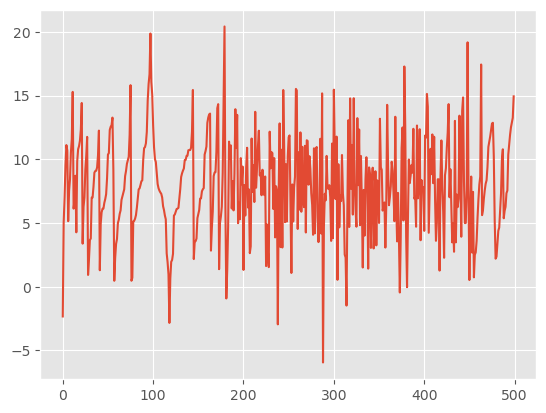

In [237]:
plt.plot(df['var7'])

In [238]:
mk.original_test(df['var7'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.9089165606157088, z=-0.11440523966696758, Tau=-0.003430861723446894, s=-428.0, var_s=13930410.666666666, slope=-0.00014863642352730064, intercept=7.774199891596106)